# Datagen SDK- Getting started

## Introduction
This jupyter notebook will guide you through [the datagen python package](https://pypi.org/project/datagen-tech/), and will explain how to easily load and parse datagen data.

Getting the package is as easy as
<pre><code>pip install datagen-tech
</code></pre>

<pre><code>import datagen 
</code></pre>

## Imports

In [1]:
import datagen
import matplotlib.pyplot as plt
from scripts.dghelpers import imshow

## Data loading

The data that you have generated and downloaded is wrapped in a zip file that represnts a **dataset**. A dataset is defined as a collection of **datapoints**. 

We define a **datapoint** to be a single rendered image (represented as <i>visible_spectrum.png</i> or <i>infrared_spectrum.png</i> in your downloaded folder), alongside all of its relevant modalities. 

You can load one or more datasets using the *load* function:

In [2]:
dataset = datagen.load("../resources/faces_1", "../resources/faces_2")

Our data is constantly enriched with more and more new capabilities over time, so different datapoints may have different modality versions. However, our loader knows how to handle data from multiple versions.

## Structure & Components

### Dataset
The dataset is our top-level object. It contains all the moving parts required to deliver full functionality to the user. <br/>

The dataset is iterable:

In [3]:
for datapoint in dataset:
    # Do something
    pass

It can also be sliced:

In [4]:
for datapoint in dataset[0:4]:
    # Do something
    pass

Or, simply access a single datapoint

In [5]:
datapoint = dataset[0]

### Scene

Each dataset is made of several <b>scenes</b>. Think of a scene as a moment in time, where an actor is photographed using multiple cameras or various lightings - all of these cameras, lightings and actors are part of the scene. A scene is an object that may include many datapoints (images).

The scene object is mapped to the scene directory within a dataset.

<b>Note:</b> Scenes were previously named environments. You might find older datasets generated on the platform where scenes are named environments. The Datagen loader supports both formats.

In [6]:
scenes = dataset.scenes
scene = scenes[0]

It is also possible to directly access a scene's datapoints:

In [7]:
scene.datapoints

[
    DataPoint(
        visible_spectrum_image_name='visible_spectrum_01.png',
        frame_num=0,
        camera='camera_1',
        scene_path=WindowsPath('../resources/faces_1/environment_00001')
    )
]

### Cameras

The camera is our third object type. It is also iterable, can be sliced, etc.

Each **scene** object is linked its relevant **cameras**:

In [8]:
camera = scene.cameras[0]

Each **camera** has its **datapoints**, where each datapoint is a single render shot from that camera:


In [9]:
camera.datapoints

[
    DataPoint(
        visible_spectrum_image_name='visible_spectrum_01.png',
        frame_num=0,
        camera='camera_1',
        scene_path=WindowsPath('../resources/faces_1/environment_00001')
    )
]

Both scene and camera datapoints can be iterated in a simple, intuitive way just like the dataset

In [10]:
for datapoint in scene:
    # Do something with the datapoint
    pass

for datapoint in camera:
    # Do something with the datapoint
    pass

## The Datapoint
The datapoint object provides access to both visual and textual modalities.<br/>
It can be accessed in several ways:

In [11]:
datapoint = dataset[0]
datapoint

DataPoint(
    visible_spectrum_image_name='visible_spectrum_01.png',
    frame_num=0,
    camera='camera_1',
    scene_path=WindowsPath('../resources/faces_1/environment_00001')
)

In [12]:
datapoint = scene[0]
datapoint

DataPoint(
    visible_spectrum_image_name='visible_spectrum_01.png',
    frame_num=0,
    camera='camera_1',
    scene_path=WindowsPath('../resources/faces_1/environment_00001')
)

In [13]:
datapoint = camera[0]
datapoint

DataPoint(
    visible_spectrum_image_name='visible_spectrum_01.png',
    frame_num=0,
    camera='camera_1',
    scene_path=WindowsPath('../resources/faces_1/environment_00001')
)

### Modality Access

All of our modalities and annotations are accessible through the datapoint object. For visual modalities, try the following commands...

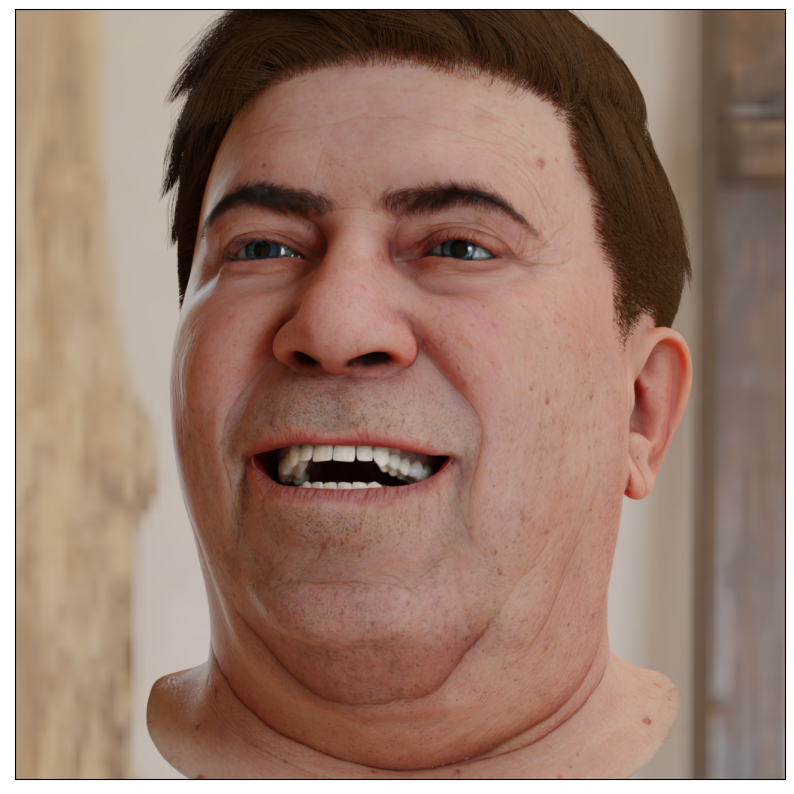

In [14]:
imshow(datapoint.visible_spectrum)

Other visual modalities can be interacted with in a similar fassion.

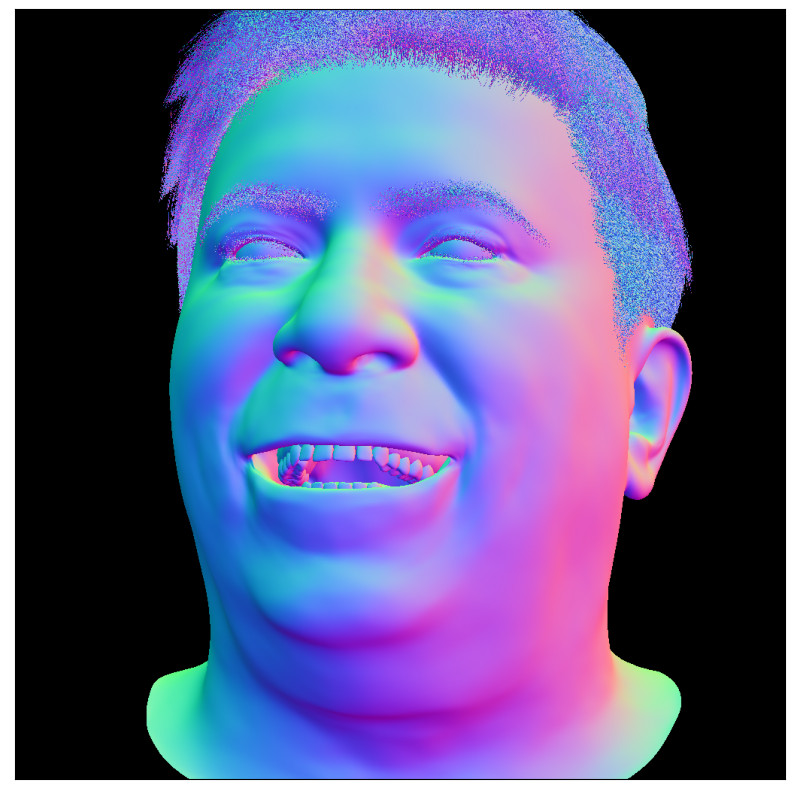

In [15]:
imshow(datapoint.normal_maps)

Access to our textual modalities is just as easy. For eaxmple, to access our *expression* modality located under the actor_metadata.json file, try the following command:

In [16]:
datapoint.actor_metadata.face_expression

FaceExpression(name='happiness', intensity_level=5)